In [62]:
import pandas as pd
import numpy as np

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('/content/mental_health_workplace_survey.csv')

In [65]:
if df['BurnoutRisk'].dtype == 'object':
    df['BurnoutRisk'] = df['BurnoutRisk'].map({'Yes': 1, 'No': 0})

In [66]:
X = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']

In [67]:
X = pd.get_dummies(X, drop_first=True)

In [68]:
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)

print("Logistic Regression without LDA")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression without LDA
Accuracy: 0.9916666666666667
Confusion Matrix:
 [[395   4]
 [  1 200]]


In [71]:
y_prob_log = model_log.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

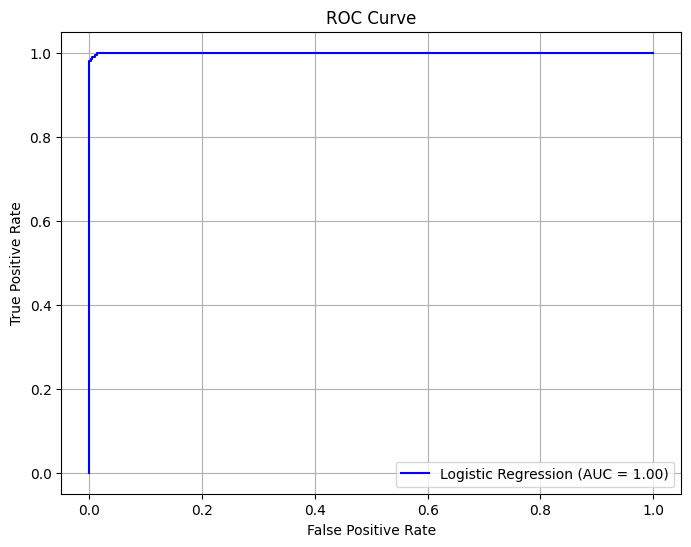

In [72]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

model_lda = LogisticRegression(max_iter=1000)
model_lda.fit(X_train_lda, y_train)
y_pred_lda = model_lda.predict(X_test_lda)

print("Logistic Regression with LDA")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

Logistic Regression with LDA
Accuracy: 0.9833333333333333
Confusion Matrix:
 [[392   7]
 [  3 198]]


In [74]:
y_prob_lda = model_lda.predict_proba(X_test_lda)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

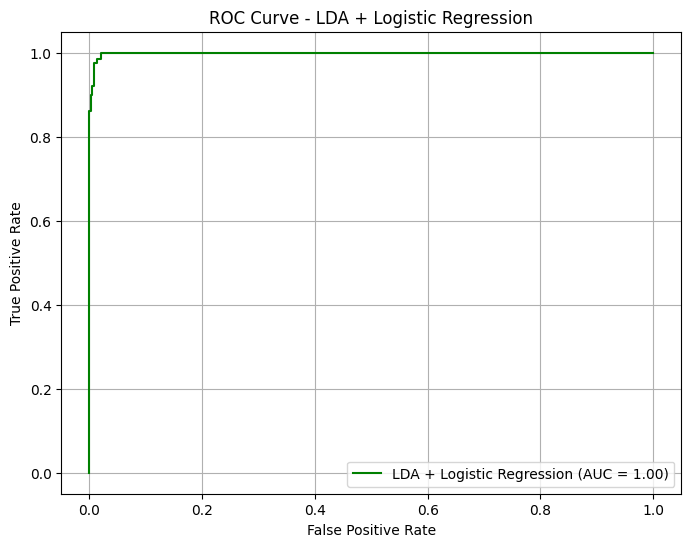

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, label=f'LDA + Logistic Regression (AUC = {roc_auc_lda:.2f})', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LDA + Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()